In [40]:
import pandas as pd

In [41]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [42]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [43]:
# raw.columns
data = pd.DataFrame(raw['EUR=']) 

In [44]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [45]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [46]:
data.tail(10)

,price,SMA1,SMA2
Date,,,
2019-12-17,1.1149,1.108155,1.120211
2019-12-18,1.1111,1.108017,1.120112
2019-12-19,1.1120,1.107950,1.120011
2019-12-20,1.1078,1.107840,1.119865
2019-12-23,1.1086,1.107738,1.119754
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333


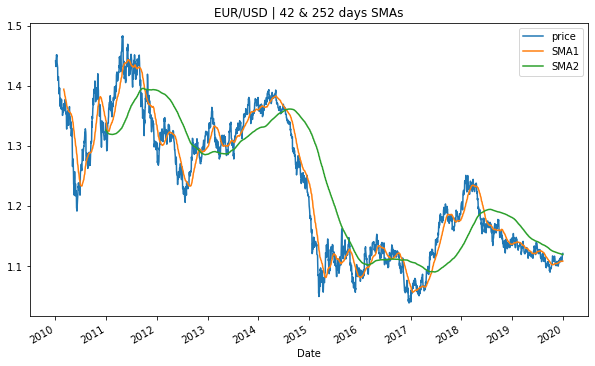

In [47]:
data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10, 6));

In [48]:
import numpy as np
# Simple Moving Average Strategy
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data['position_0_1'] = np.where(data['SMA1'] > data['SMA2'], 1, 0)

In [49]:
data['position'].dropna(inplace=True)
data['position_0_1'].dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

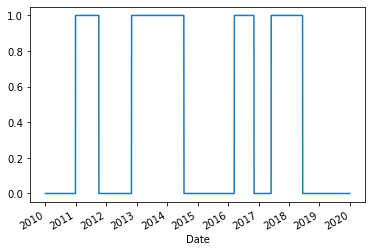

In [50]:
data['position_0_1'].plot()

<AxesSubplot:xlabel='Date'>

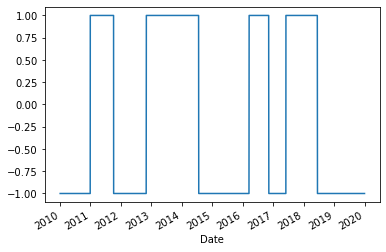

In [51]:
data['position'].plot()

In [52]:
data['raw_returns'] = data['price'] / data['price'].shift(1)
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [53]:
data['returns'].head()

Date
2010-01-04         NaN
2010-01-05   -0.002988
2010-01-06    0.003058
2010-01-07   -0.006544
2010-01-08    0.006544
Name: returns, dtype: float64

In [54]:
data['price'][:10]

Date
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
2010-01-08    1.4412
2010-01-11    1.4513
2010-01-12    1.4494
2010-01-13    1.4510
2010-01-14    1.4502
2010-01-15    1.4382
Name: price, dtype: float64

In [55]:
np.exp(data['returns'].head())

Date
2010-01-04         NaN
2010-01-05    0.997016
2010-01-06    1.003062
2010-01-07    0.993478
2010-01-08    1.006565
Name: returns, dtype: float64

In [56]:
data['strategy'] = data['position'].shift(1) * data['returns']
data['strategy_0_1'] = data['position_0_1'].shift(1) * data['returns']

In [57]:
data[['returns', 'strategy']].sum()

returns    -0.251186
strategy    0.327576
dtype: float64

In [58]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.777878
strategy    1.387600
dtype: float64

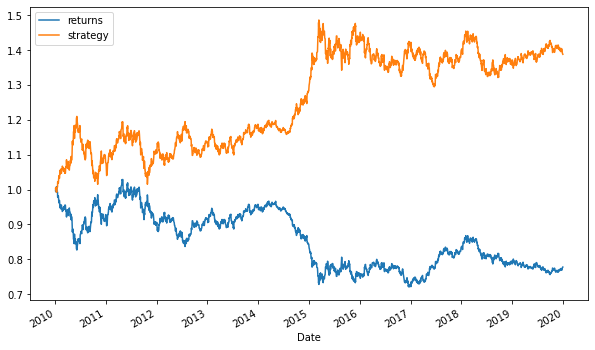

In [59]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

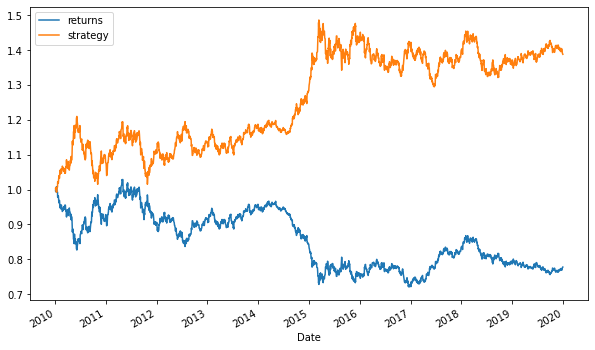

In [60]:
data[['returns', 'strategy']].apply(np.cumsum).apply(np.exp).plot(figsize=(10, 6));

In [61]:
data[['returns', 'strategy']].mean() * 252

returns    -0.025168
strategy    0.032823
dtype: float64

In [62]:
data['cum_return'] = data['strategy'].cumsum().apply(np.exp)

In [63]:
data['cum_max'] = data['cum_return'].cummax()

<AxesSubplot:xlabel='Date'>

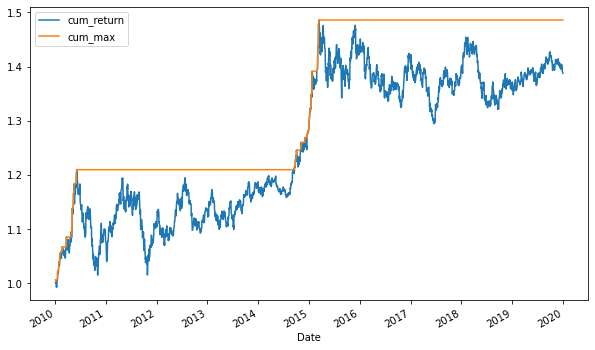

In [64]:
data[['cum_return', 'cum_max']].dropna().plot(figsize=(10, 6))

In [65]:
drawdown = data['cum_max'] - data['cum_return']
drawdown.max()

0.1945832487856176

<AxesSubplot:xlabel='Date'>

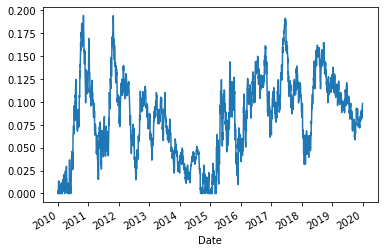

In [66]:
drawdown.plot()

In [71]:
zero_drawdown = drawdown[drawdown == 0]

In [74]:
diff = zero_drawdown[1:].index.to_pydatetime()  - zero_drawdown[:-1].index.to_pydatetime() 

In [75]:
diff

array([datetime.timedelta(days=2), datetime.timedelta(days=12),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=5), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=6), datetime.timedelta(days=1),
       datetime.timedelta(days=3), datetime.timedelta(days=4),
       datetime.timedelta(days=5), datetime.timedelta(days=5),
       datetime.timedelta(days=1), datetime.timedelta(days=28),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=33), datetime.timedelta(days=7),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=5), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=4), datetime.timedelta(days=8),
       datetime.timedelta(days=8), datetime.timedelta(days=1),
       datetime.timedelta(days=3), datetime.timedelt

In [76]:
diff.max()

datetime.timedelta(days=1563)